# Fixed-at-end Locality
Where all mutations are applied to the end of the program

**Imports:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from os import listdir
from os.path import isfile, join
import dataframe_image as dfi

**Data Retrieval:**

Insert local path to your Results folder here:

In [2]:
path = "C:\\Path\\to\\folder\\containing\\the\\results\\" # TODO FILL IN THE LOCAL PATH

In [3]:

robot_files =  [f for f in listdir(path + "robot\\")  if isfile(join(path + "robot\\", f))]
pixel_files =  [f for f in listdir(path + "pixel\\")  if isfile(join(path + "pixel\\", f))]
string_files = [f for f in listdir(path + "string\\") if isfile(join(path + "string\\", f))]


In [4]:

robot_data = []
for file in robot_files:
    with open(path + 'robot\\' + file, 'r') as f:
      l = json.loads(f.readlines()[-1])
      if ('domain' in l.keys() and l['domain'] == "robot"):
            robot_data.append(l)
    
    
    
pixel_data = []
for file in pixel_files:
    with open(path + 'pixel\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "pixel"):
            pixel_data.append(l)

string_data = []
for file in string_files:
    with open(path + 'string\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "string"):
            string_data.append(l)

## Print Results

In [5]:

print("\nCases solved (Robot):")
for x in robot_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + x['cases_solved'])

print("\nCases solved (Pixel):")
for x in pixel_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + x['cases_solved'])
    
print("\nCases solved (String):")
for x in string_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + x['cases_solved'])

print("\nExecution Time (Robot):")
for x in robot_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['execution_time']))

print("\nExecution Time (Pixel):")
for x in pixel_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['execution_time']))
    
print("\nExecution Time (String):")
for x in string_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['execution_time']))

print("\nExecution Time (Robot):")
for x in robot_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['program_length']))

print("\nExecution Time (Pixel):")
for x in pixel_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['program_length']))
    
print("\nExecution Time (String):")
for x in string_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['program_length']))




Cases solved (Robot):
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)

Cases solved (Pixel):
alpha=1	: 97 / 500 (19.4%)
alpha=1	: 97 / 500 (19.4%)
alpha=1	: 89 / 500 (17.8%)
alpha=1	: 86 / 500 (17.2%)
alpha=1	: 101 / 500 (20.2%)
alpha=1	: 99 / 500 (19.8%)
alpha=1	: 96 / 500 (19.2%)
alpha=1	: 

## Data Organization

Group by mutation, while keeping others variables at the fixed control variables

In [6]:
#Default Weights

default = {
    "add_token_end": 30,
    "remove_token_end": 30,
    "add_loop_end": 30,
    "add_if_statement_end": 30,
    "start_over": 6
}


In [7]:
{k: v for k, v in default.items() if k != "alpha"}

{'add_token_end': 30,
 'remove_token_end': 30,
 'add_loop_end': 30,
 'add_if_statement_end': 30,
 'start_over': 6}

In [8]:
base_data_robot = [x for x in robot_data if all(map(lambda t: x['params'][t[0]] == t[1], default.items()))]
base_data_pixel = [x for x in pixel_data if all(map(lambda t: x['params'][t[0]] == t[1], default.items()))]
base_data_string = [x for x in string_data if all(map(lambda t: x['params'][t[0]] == t[1], default.items()))]

In [9]:
# A quick test to see if it works
k = "add_token_end"
merged_data = [robot_data, pixel_data, string_data]
merged_base_data = [base_data_robot, base_data_pixel, base_data_string]

test = list(filter(lambda x: x['params'][k] != default[k], [*robot_data, *pixel_data, *string_data])) + base_data_robot
test2 = [list(filter(lambda x: x['params'][k] != default[k], d)) for d in [robot_data, pixel_data, string_data]]
test3 = [list(filter(lambda x: x['params'][k] != default[k], merged_data[i])) + merged_base_data[i] for i in range(len(merged_data))]


list(map(lambda y: str(y['domain']) + str(y['params'].values()), test3[2]))

["stringdict_values(['metropolis', 1, 10, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 20, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 40, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 50, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 30, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 30, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 30, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 30, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 30, 0, 30, 0, 30, 0, 30, 0, 6])",
 "stringdict_values(['metropolis', 1, 30, 0, 30, 0, 30, 0, 30, 0, 6])"]

## Plot Data - Based on Weight

**Helper Functions:**

In [10]:
def plot_figure_cases_solved(data, param):
    plt.figure()
    for d in data:
        xs = [i['params'][param] for i in d]
        ys = [float(re.match(".*\((.*)%\).*$", j['cases_solved']).group(1)) for j in d]
        plt.scatter(xs, ys, linewidth=1, label=d[0]['domain'])
        plt.xlabel(param)
        plt.ylabel("Cases Solved \(\%\)") 
        for x,y in zip(xs,ys):
            label = "{:.2f}".format(y)
            plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')   
    plt.legend()

def plot_figure_execution_time(data, param, errorbars):
    plt.figure()
    for d in data:
        xs = [i['params'][param] for i in d]
        ys = [j['average_correct']['execution_time'] for j in d]
        plt.scatter(xs, ys, label=d[0]['domain'])
        if errorbars:
            err =  [np.sqrt(j['variance_correct']['execution_time']) for j in d]
            plt.errorbar(x, y, yerr=err, capsize=5, capthick=2, alpha=0.5)
        plt.xlabel(param)
        plt.ylabel("Execution Time")
        for x,y in zip(xs,ys):
            label = "{:.2f}".format(y)
            plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')   
    plt.legend()

def plot_figure_program_length(data, param, errorbars):
    plt.figure()
    for d in data:
        xs = [i['params'][param] for i in d]
        ys = [x['average_correct']['program_length'] for x in d]
        plt.scatter(xs, ys, label=d[0]['domain'])
        if errorbars:
            err =  [np.sqrt(j['variance_correct']['program_length']) for j in d]
            plt.errorbar(x, y, yerr=err, capsize=5, capthick=2, alpha=0.5)
        plt.xlabel(param)
        plt.ylabel("Program Length")
        for x,y in zip(xs,ys):
            label = "{:.2f}".format(y)
            plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')   
    plt.legend()
    return plt


In [11]:
def plot_weight_figure(data, param, errorbars):
    fig, axs = plt.subplots(1,3, figsize=(18, 6))    
    
    for d in data:
        xs = [i['params'][param] for i in d]
        ys0 = [float(re.match(".*\((.*)%\).*$", j['cases_solved']).group(1)) for j in d]
        ys1 = [j['average_correct']['execution_time'] for j in d]
        ys2 = [j['average_correct']['program_length'] for j in d]
        ys = [ys0, ys1, ys2]
        ylabels = ["Cases Solved (%)", "Execution Time (s)", "Program Length"]
        
        for i in range(3):
            a,b = np.polyfit(xs, ys[i], 1)
            axs[i].plot(xs, ys[i], 'o', label=d[0]['domain'] + " -> " + str('%.1g' % a))
            axs[i].set_xlabel(param)
            axs[i].set_ylabel(ylabels[i])
            axs[i].legend()
            
        if errorbars:
            err1 =  [np.sqrt(j['variance_correct']['execution_time']) for j in d]
            err2 =  [np.sqrt(j['variance_correct']['program_length']) for j in d]
            axs[1].errorbar(x, y, yerr=err1, capsize=5, capthick=2, alpha=0.5)
            axs[2].errorbar(x, y, yerr=err2, capsize=5, capthick=2, alpha=0.5)
        
#         Uncomment to annotate
#         for x,y in zip(xs,np.array(ys).T.tolist()):
#             axs[0].annotate("{:.2f}".format(y[0]), # this is the text
#                      (x,y[0]), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center')
#             axs[1].annotate("{:.2f}".format(y[1]), # this is the text
#                      (x,y[1]), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center')  
#             axs[2].annotate("{:.2f}".format(y[2]), # this is the text
#                      (x,y[2]), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center')  

    plt.legend()
    

**Plot Results:**

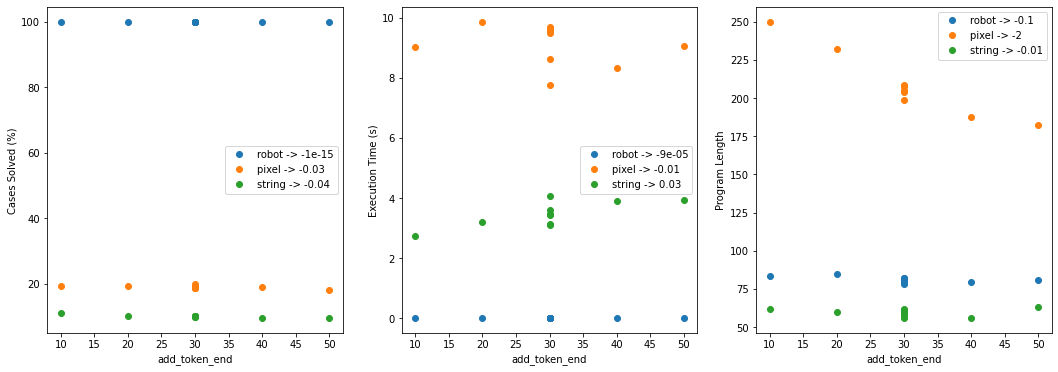

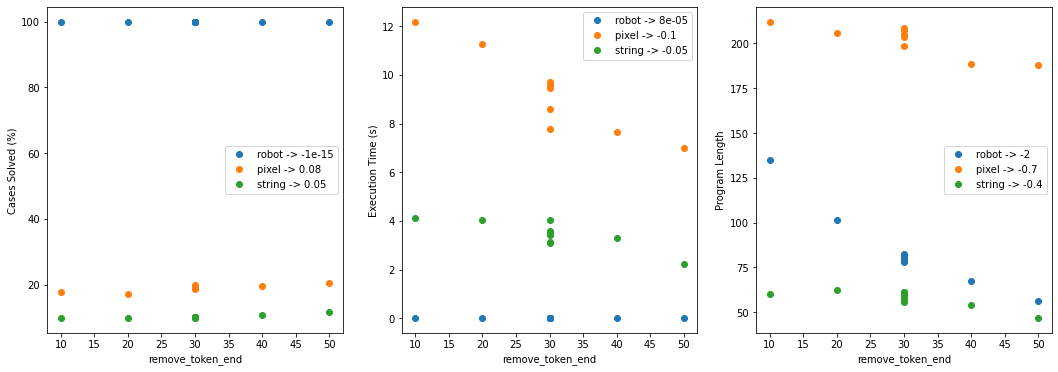

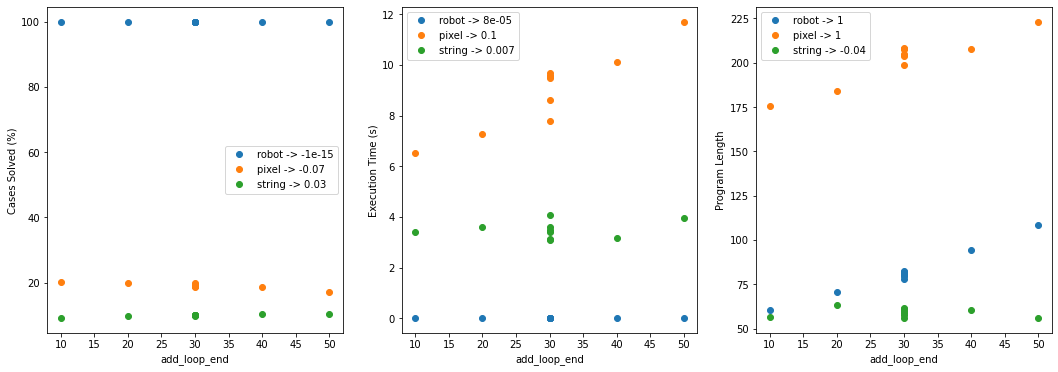

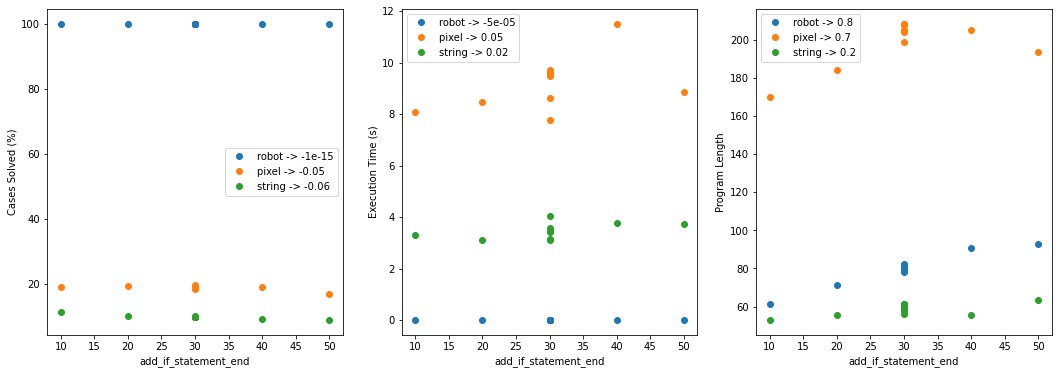

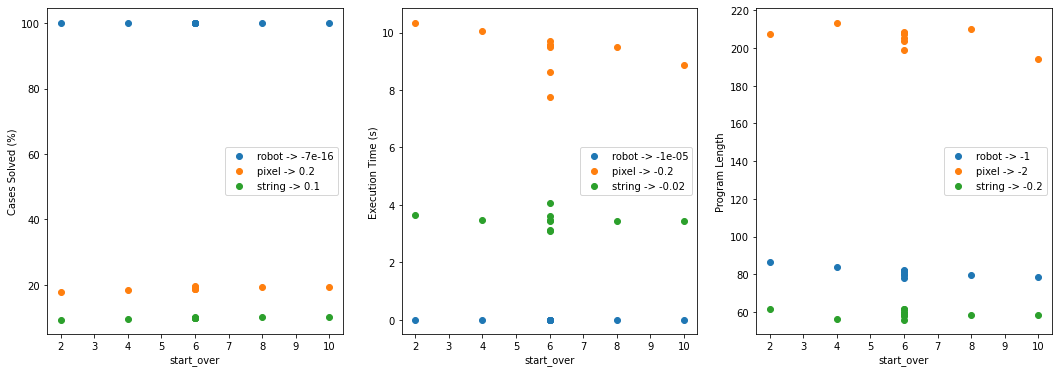

In [12]:
merged_data = [robot_data, pixel_data, string_data]
merged_base_data = [base_data_robot, base_data_pixel, base_data_string]

# Plot series of 3 graphs for each parameter
for k, v in default.items():
    data = [list(filter(lambda x: x['params'][k] != default[k], merged_data[i])) + merged_base_data[i] for i in range(len(merged_data))]
    plot_weight_figure(data, k, False)

#     You can also plot individual metric graphs:
#     plt1 = plot_figure_cases_solved(data, k)
#     plt2 = plot_figure_execution_time(data, k, False)
#     plt3 = plot_figure_program_length(data, k, False)



## Plot Results - Probability Based

This is based on the probability that a mutation is selected instead of their weight since this is also dependent on the total sum of weights of all mutations

**New plot method:**


In [13]:
def plot_prob_figure(data, param, errorbars):
    fig, axs = plt.subplots(1,3, figsize=(18, 6))    
    
    for d in data:
        total = 126 - default[param]
        xs = [i['params'][param] / (total+i['params'][param]) for i in d]
        ys0 = [float(re.match(".*\((.*)%\).*$", j['cases_solved']).group(1)) for j in d]
        ys1 = [j['average_correct']['execution_time'] for j in d]
        ys2 = [j['average_correct']['program_length'] for j in d]
        ys = [ys0, ys1, ys2]
        ylabels = ["Cases Solved (%)", "Execution Time (s)", "Program Length"]
        
        for i in range(3):
            a,b = np.polyfit(xs, ys[i], 1)
            axs[i].plot(xs, ys[i], 'o', label=d[0]['domain'])# + " -> " + str('%.1g' % a))
            axs[i].set_xlabel(param)
            axs[i].set_ylabel(ylabels[i])
            axs[i].legend()
            
        if errorbars:
            err1 =  [np.sqrt(j['variance_correct']['execution_time']) for j in d]
            err2 =  [np.sqrt(j['variance_correct']['program_length']) for j in d]
            axs[1].errorbar(x, y, yerr=err1, capsize=5, capthick=2, alpha=0.5)
            axs[2].errorbar(x, y, yerr=err2, capsize=5, capthick=2, alpha=0.5)
        
#         Uncomment to add value text to points
#         for x,y in zip(xs,np.array(ys).T.tolist()):
#             axs[0].annotate("{:.2f}".format(y[0]), # this is the text
#                      (x,y[0]), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center')
#             axs[1].annotate("{:.2f}".format(y[1]), # this is the text
#                      (x,y[1]), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center')  
#             axs[2].annotate("{:.2f}".format(y[2]), # this is the text
#                      (x,y[2]), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center')  

    plt.legend()
    

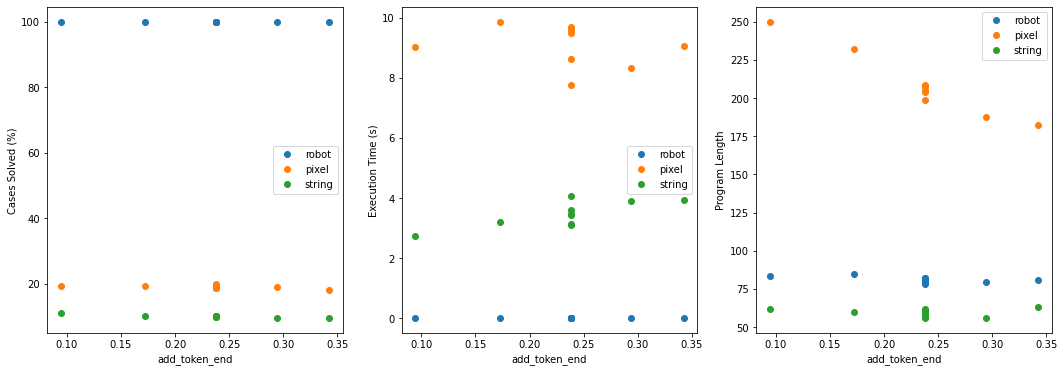

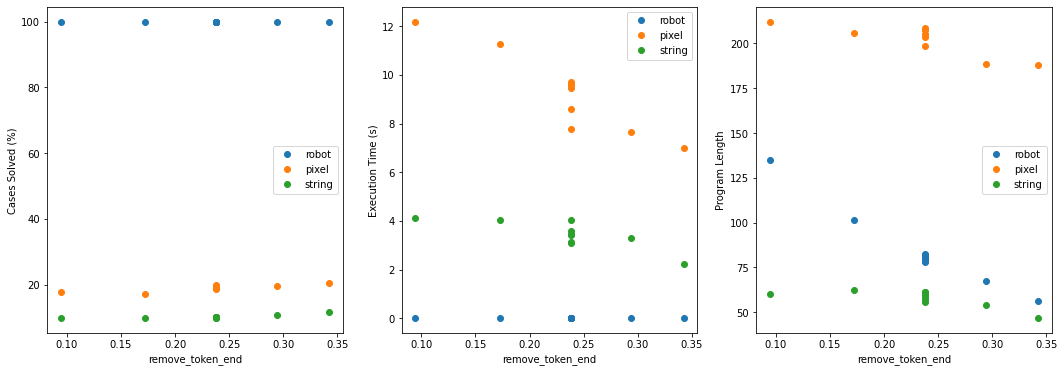

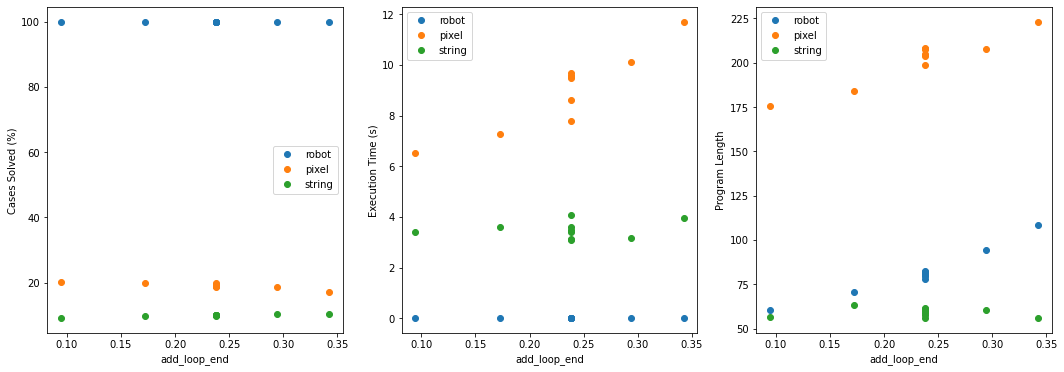

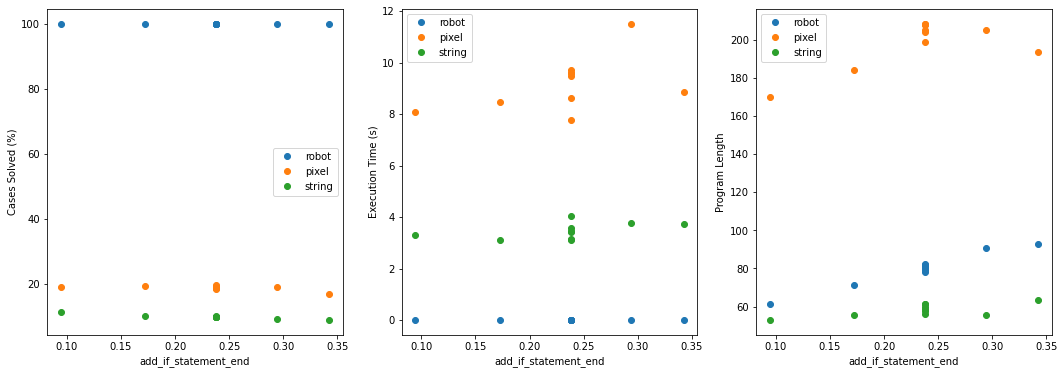

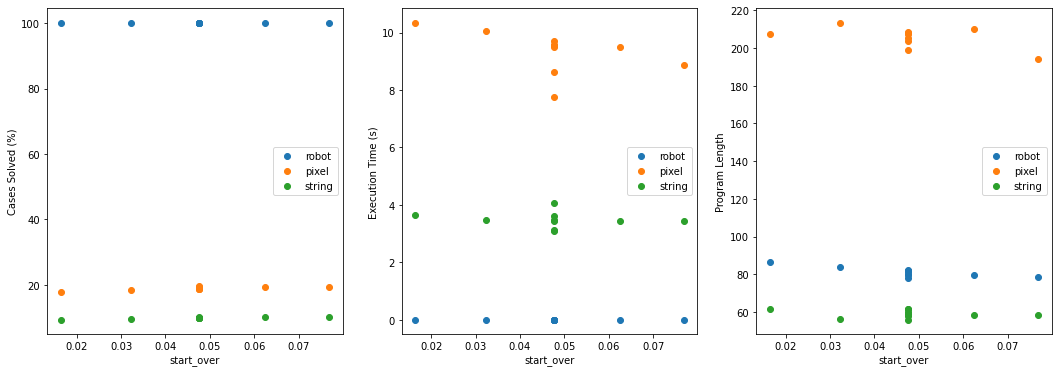

In [14]:
merged_data = [robot_data, pixel_data, string_data]
merged_base_data = [base_data_robot, base_data_pixel, base_data_string]
         
for k, v in default.items():
    data = [list(filter(lambda x: x['params'][k] != default[k], merged_data[i])) + merged_base_data[i] for i in range(len(merged_data))]
    plot_prob_figure(data, k, False)

## Calculating Correlations

In [15]:
# Cacluating correlation
# TODO fix the way total is calculated!!!!!!!!!!!
print("Correlation:\n(parameter's relative weight to metrics)")
for k, v in default.items():
    print("\n" + k)
    data = [list(filter(lambda x: x['params'][k] != default[k], merged_data[i])) + merged_base_data[i] for i in range(len(merged_data))]
    total = sum(default.values())
    x = [d['params'][k] / total for d in data[0]]
    for d in data:
        ys0 = [float(re.match(".*\((.*)%\).*$", j['cases_solved']).group(1)) for j in d]
        ys1 = [j['average_correct']['execution_time'] for j in d]
        ys2 = [j['average_correct']['program_length'] for j in d]
        ys = [ys0, ys1, ys2]
        print(d[0]['domain'] + ": " + str([np.corrcoef(x, y)[0,1] for y in ys]))
    

Correlation:
(parameter's relative weight to metrics)

add_token_end
robot: [nan, -0.8867868645403933, -0.5395525270891918]
pixel: [-0.6464599351554539, -0.22422644980027137, -0.9567369869940794]
string: [-0.9267399411318503, 0.7688112405868434, -0.04563533954577422]

remove_token_end
robot: [nan, 0.5767667488036341, -0.9537478808593838]
pixel: [0.8574579965723959, -0.9153758480381257, -0.8330396696161961]
string: [0.8344356565451112, -0.8353008255855848, -0.7890383562533444]

add_loop_end
robot: [nan, 0.9097120162326283, 0.987854975278083]
pixel: [-0.8999999999999998, 0.9177241379131975, 0.9306393151411395]
string: [0.8806428986221468, 0.22988211081560067, -0.15636207109924338]

add_if_statement_end
robot: [nan, -0.8079731640126175, 0.9706863117200306]
pixel: [-0.6595796519151753, 0.4555024456936425, 0.5724903071701941]
string: [-0.9581402751608169, 0.5012214643992088, 0.6704481440929769]

start_over
robot: [nan, -0.09294814506163424, -0.8148908631396473]
pixel: [0.6985354731356994, -

C:\Users\Bo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Bo\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [16]:
drop_cols = ['domain',
 'files',
 'params.type',
 'params.alpha',
 'params.add_token_random',
 'params.remove_token_random',
 'params.add_loop_random',
 'params.add_if_statement_random',
 'average.test_cost',
 'average.train_cost',
 'average.execution_time',
 'average.program_length',
 'average.number_of_explored_programs',
 'average.number_of_iterations',
 'average_correct.test_cost',
 'average_correct.train_cost',
 'average_correct.number_of_explored_programs',
 'average_correct.number_of_iterations',
 'average_failed.test_cost',
 'average_failed.train_cost',
 'average_failed.execution_time',
 'average_failed.program_length',
 'average_failed.number_of_explored_programs',
 'average_failed.number_of_iterations',
 'variance.test_cost',
 'variance.train_cost',
 'variance.execution_time',
 'variance.program_length',
 'variance.number_of_explored_programs',
 'variance.number_of_iterations',
 'variance_correct.test_cost',
 'variance_correct.train_cost',
 'variance_correct.execution_time',
 'variance_correct.program_length',
 'variance_correct.number_of_explored_programs',
 'variance_correct.number_of_iterations',
 'variance_failed.test_cost',
 'variance_failed.train_cost',
 'variance_failed.execution_time',
 'variance_failed.program_length',
 'variance_failed.number_of_explored_programs',
 'variance_failed.number_of_iterations',
 'best_results.file',
 'best_results.test_cost',
 'best_results.train_cost',
 'best_results.execution_time',
 'best_results.program_length',
 'best_results.number_of_explored_programs',
 'best_results.program',
 'best_results.cost_per_iteration',
 'best_results.number_of_iterations']

#  Test Case
df = pd.json_normalize(robot_data).drop(drop_cols, axis=1)
df['cases_solved'] = df['cases_solved'].apply(lambda x: float(re.match(".*\((.*)%\).*$", x).group(1)))
df['params.add_token_end'] = df['params.add_token_end'].apply(lambda x: x / (96 + x))
df['params.remove_token_end'] = df['params.remove_token_end'].apply(lambda x: x / (96 + x))
df['params.add_loop_end'] = df['params.add_loop_end'].apply(lambda x: x / (96 + x))
df['params.add_if_statement_end'] = df['params.add_if_statement_end'].apply(lambda x: x / (96 + x))
df['params.start_over'] = df['params.start_over'].apply(lambda x: x / (120 + x))


In [17]:
name_map = {
    'params.add_token_end': 'add_token_end',
    'params.remove_token_end': 'remove_token_end',
    'params.add_loop_end': 'add_loop_end',
    'params.add_if_statement_end': 'add_if_statement_end',
    'params.start_over': 'start_over',
    'cases_solved': 'cases_solved',
    'average_correct.execution_time': 'execution_time',
    'average_correct.program_length': 'program_length',
}

indep_vars = [
    'add_token_end',
    'remove_token_end',
    'add_loop_end',
    'add_if_statement_end',
    'start_over',
]

dep_vars = [
    'cases_solved',
    'execution_time',
    'program_length',
]

# Test rearrangement
df.rename(columns=name_map).corr().drop(indep_vars, axis=1).drop(dep_vars, axis=0)

,cases_solved,execution_time,program_length
add_token_end,NaN,-0.486919,-0.037759
remove_token_end,NaN,0.326951,-0.788830
add_loop_end,NaN,0.380261,0.468589
add_if_statement_end,NaN,-0.235056,0.339304
start_over,NaN,-0.007371,-0.077965


**Print Correlation Tables:** <br>
*(For each domain)*

In [18]:
domains=[robot_data, pixel_data, string_data]
labels = ['robot', 'pixel', 'string']

res0 = []
res1 = []
res2 = []
for d in domains:
    df = pd.json_normalize(d).drop(drop_cols, axis=1)
    df['cases_solved'] = df['cases_solved'].apply(lambda x: float(re.match(".*\((.*)%\).*$", x).group(1)))
    df['params.add_token_end'] = df['params.add_token_end'].apply(lambda x: x / (96 + x))
    df['params.remove_token_end'] = df['params.remove_token_end'].apply(lambda x: x / (96 + x))
    df['params.add_loop_end'] = df['params.add_loop_end'].apply(lambda x: x / (96 + x))
    df['params.add_if_statement_end'] = df['params.add_if_statement_end'].apply(lambda x: x / (96 + x))
    df['params.start_over'] = df['params.start_over'].apply(lambda x: x / (120 + x))
    
    # 3 Different types of correlation, Kendall was used because it is non-parametric and more accurate than spearman
    corr_matrix0 = df.rename(columns=name_map).corr(method='pearson').drop(indep_vars, axis=1).drop(dep_vars, axis=0)
    corr_matrix1 = df.rename(columns=name_map).corr(method='spearman').drop(indep_vars, axis=1).drop(dep_vars, axis=0)
    corr_matrix2 = df.rename(columns=name_map).corr(method='kendall').drop(indep_vars, axis=1).drop(dep_vars, axis=0)
    
    print(d[0]['domain'].title() + ":")
    display(corr_matrix2)
    
    # Store the tables as images (they can be found in the same folder as this notebook)
    dfi.export(corr_matrix2, "mutation-weights-end-"+d[0]['domain']+".png")
    res0.append(corr_matrix0.to_numpy().T)
    res1.append(corr_matrix1.to_numpy().T)
    res2.append(corr_matrix2.to_numpy().T)    


Robot:


,cases_solved,execution_time,program_length
add_token_end,NaN,-0.457704,-0.125869
remove_token_end,NaN,0.160196,-0.503474
add_loop_end,NaN,0.411933,0.457704
add_if_statement_end,NaN,-0.240294,0.377606
start_over,NaN,-0.045770,-0.205967


Pixel:


,cases_solved,execution_time,program_length
add_token_end,-0.223692,-0.102983,-0.469146
remove_token_end,0.453271,-0.480589,-0.240294
add_loop_end,-0.429724,0.469146,0.400491
add_if_statement_end,-0.223692,0.205967,0.160196
start_over,0.223692,-0.171639,-0.080098


String:


,cases_solved,execution_time,program_length
add_token_end,-0.367980,0.377606,-0.068656
remove_token_end,0.326434,-0.469146,-0.377606
add_loop_end,0.326434,0.034328,-0.091541
add_if_statement_end,-0.462943,0.263180,0.263180
start_over,0.326434,-0.068656,-0.045770


**Plot Correlation Graph:**

In [19]:
def plot_correlation_graphs(raw_data):
    fig, axs = plt.subplots(1, 3, figsize=(18,6))

    empty = np.repeat("", 5)
    N = 5
    width = 0.25
    ind = np.arange(N)

    for i in range(3): # metrics
        for d in range(3): # domains
            data = [list(map(lambda x: x, list(x))) for x in raw_data[d]] # abs(x) for abs value
            axs[i].barh(ind + d*width, data[i], width, label=labels[d])
            axs[i].set(yticks=ind+width, yticklabels=list(empty))
        axs[i].set_xlim(-1, 1)
        axs[i].legend()
        axs[i].set_title(re.sub("\_", " ", dep_vars[i]).title())
        axs[i].axvline(0, color='k')
    axs[0].set(yticks=ind+width, yticklabels=indep_vars)
    fig.tight_layout()


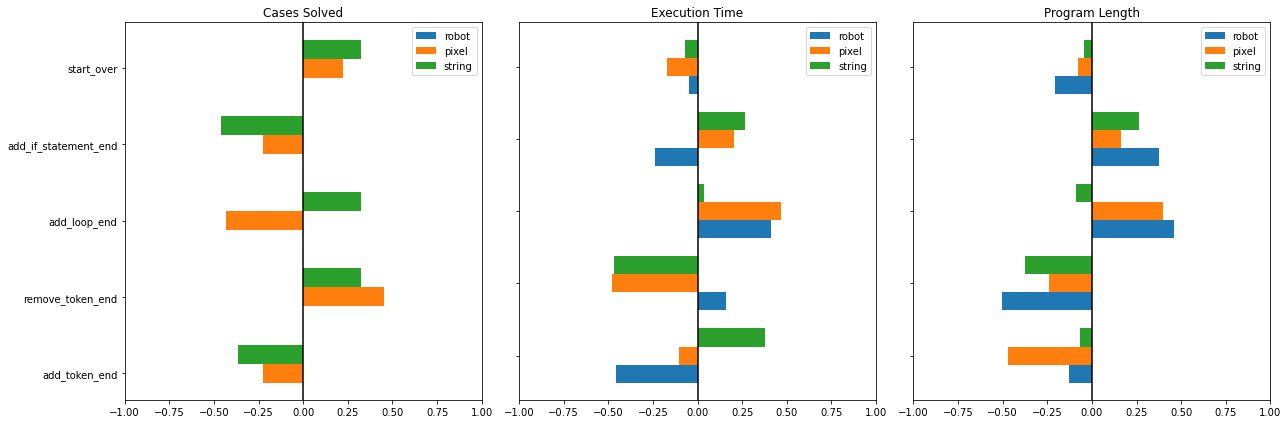

In [20]:
plot_correlation_graphs(res2)